# QuTiP Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import qctrlvisualizer as qv

plt.style.use(qv.get_qctrl_style())
plt.style.use("ggplot")

## 1-qubit

$$
\begin{aligned}
H &= \frac{\delta}{2} \sigma_z + \frac{I(t)}{2} \sigma_x + \frac{Q(t)}{2} \sigma_y
\\
&= \frac{\delta}{2} \sigma_z + \frac{\Omega(t)}{2} \sigma_+ + \frac{\Omega^*(t)}{2} \sigma_-
\end{aligned}
$$

In [2]:
T = 1.0
THETA = np.pi
detunings = np.linspace(-10, 10, 200)


def flat_pulse(t, args):
    return THETA / T


def gaussian_pulse(t, args={}):
    mu = 0.5 * T
    sigma = T / 6
    return (
        THETA
        / (np.sqrt(2 * np.pi) * sigma)
        * np.exp(-((t - mu) ** 2) / (2 * sigma**2))
    )


def drag_pulse_x(t, args={}):
    mu = 0.5 * T
    sigma = T / 6
    amp = np.pi
    beta = 0.1

    real = (
        amp
        / (np.sqrt(2 * np.pi) * sigma)
        * np.exp(-((t - mu) ** 2) / (2 * sigma**2))
    )
    imag = -1 * beta * (t - mu) / sigma**2 * real
    return real


def drag_pulse_y(t, args={}):
    mu = 0.5 * T
    sigma = T / 6
    amp = np.pi
    beta = 0.1

    real = (
        amp
        / (np.sqrt(2 * np.pi) * sigma)
        * np.exp(-((t - mu) ** 2) / (2 * sigma**2))
    )
    imag = -1 * beta * (t - mu) / sigma**2 * real
    return imag


def hamiltonian(detuning, pulse_x, pulse_y):
    return [
        0.5 * THETA * detuning * qt.sigmaz(),
        [0.5 * qt.sigmax(), pulse_x],
        [0.5 * qt.sigmay(), pulse_y],
    ]


def draw_bloch_trajectory(hamiltonian, times, initial_state):
    initial_state = qt.Qobj(initial_state)
    propagators = [qt.propagator(hamiltonian, t) for t in times]
    states = [U * initial_state for U in propagators]
    states = np.array(states).squeeze()
    qv.display_bloch_sphere(states)


def plot_profile(pulse_x, pulse_y):
    times = np.linspace(0, T, 2)
    initial_state = qt.basis(2, 0)

    e_x = []
    e_y = []
    e_z = []
    for detuning in detunings:
        result = qt.sesolve(
            hamiltonian(detuning, pulse_x, pulse_y),
            initial_state,
            times,
            [
                qt.sigmax(),
                qt.sigmay(),
                qt.sigmaz(),
            ],
        )
        e_x.append(result.expect[0][-1])
        e_y.append(result.expect[1][-1])
        e_z.append(result.expect[2][-1])

    # plt.plot(detunings, e_x, label=r"$\langle\sigma_x\rangle$")
    plt.plot(detunings, e_y, label=r"$\langle\sigma_y\rangle$")
    plt.plot(detunings, e_z, label=r"$\langle\sigma_z\rangle$")
    plt.xlabel("Detuning")
    plt.ylabel("Expectation value")
    plt.legend()

    print(np.argmin(e_z))

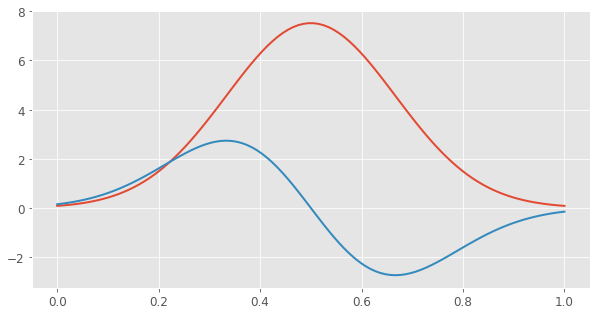

In [3]:
tlist = np.linspace(0, T, 100)
plt.plot(tlist, [drag_pulse_x(t) for t in tlist])
plt.plot(tlist, [drag_pulse_y(t) for t in tlist])

### DRAG

$$
\begin{aligned}
I(t) &= \frac{\pi}{\sqrt{2\pi}\sigma}  e^{-\frac{(t - \mu)^2}{2\sigma^2}}
\\
Q(t) &= - \frac{\beta(t - \mu)}{\sigma^2} I(t)
\end{aligned}
$$

90


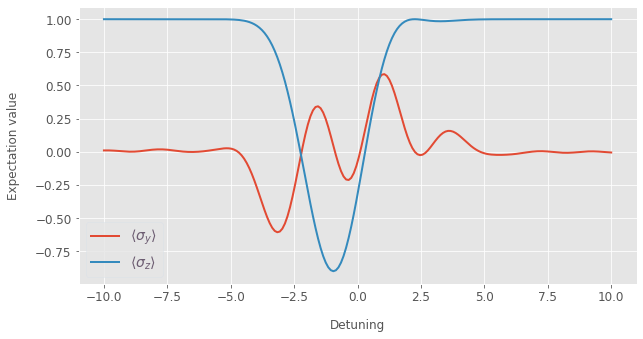

In [4]:
plot_profile(drag_pulse_x, drag_pulse_y)

In [5]:
draw_bloch_trajectory(
    hamiltonian(0, drag_pulse_x, drag_pulse_y),
    np.linspace(0, T, 100),
    qt.basis(2, 0),
)

<IPython.core.display.Javascript object>

In [6]:
T = 1.0

def drag_pulse(t):
    mu = 0.5 * T
    sigma = T / 6
    amp = np.pi
    beta = 0.2

    real = (
        amp
        / (np.sqrt(2 * np.pi) * sigma)
        * np.exp(-((t - mu) ** 2) / (2 * sigma**2))
    )
    imag = -1 * beta * (t - mu) / sigma**2 * real
    return real + 1j * imag

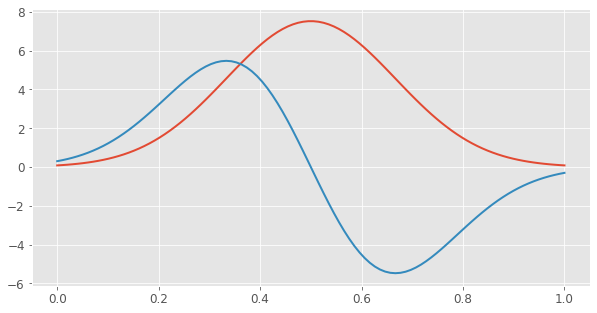

In [7]:
tlist = np.linspace(0, T, 100)
plt.plot(tlist, [drag_pulse(t).real for t in tlist])
plt.plot(tlist, [drag_pulse(t).imag for t in tlist])

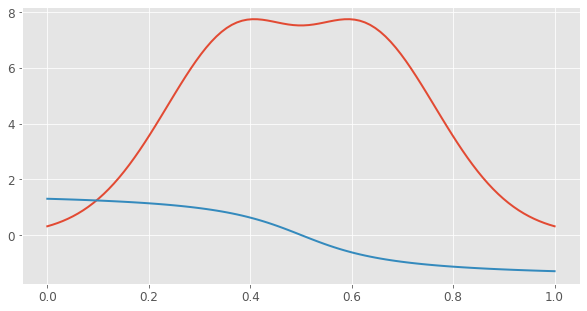

In [8]:
plt.plot(tlist, [np.abs(drag_pulse(t)) for t in tlist])
plt.plot(tlist, [np.angle(drag_pulse(t)) for t in tlist])